Head of the dataset:
   Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  

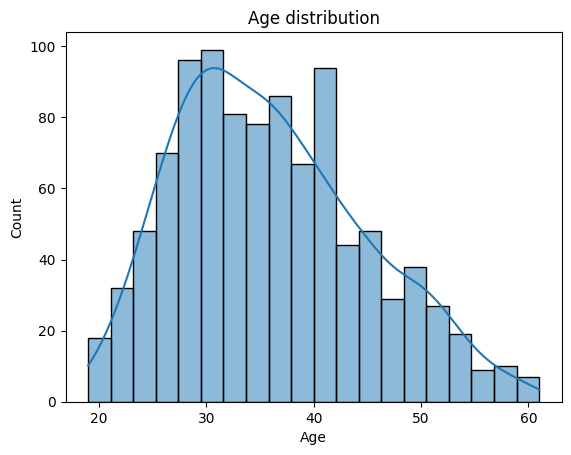

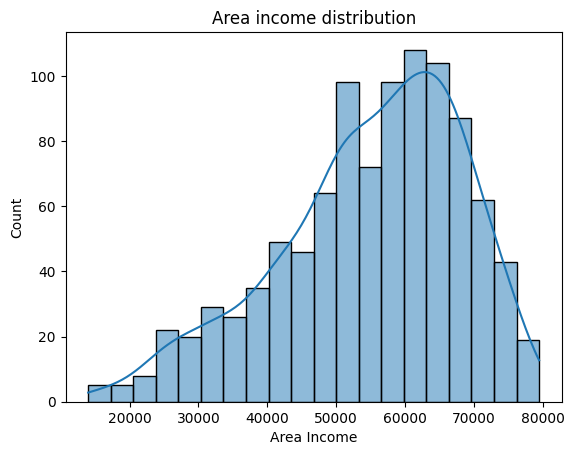

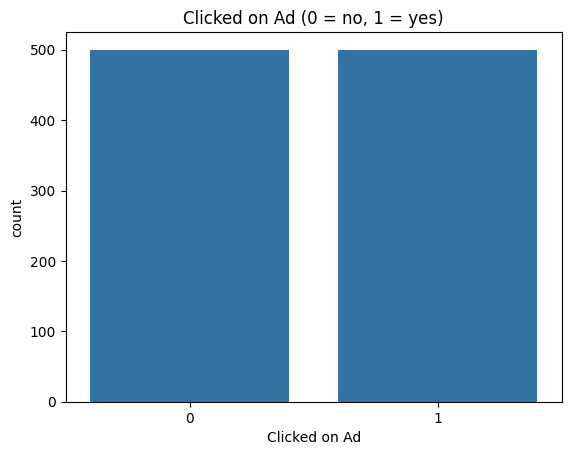

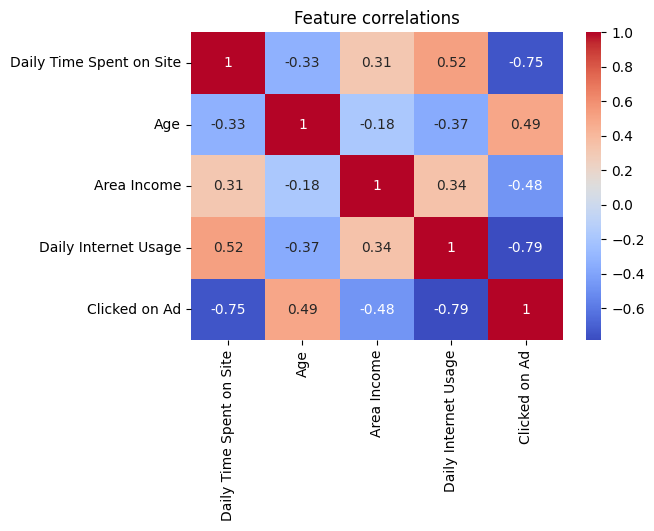


Model performance on test set:
Accuracy: 0.95
Precision: 0.9719626168224299
Recall: 0.9369369369369369
F1 Score: 0.9541284403669725


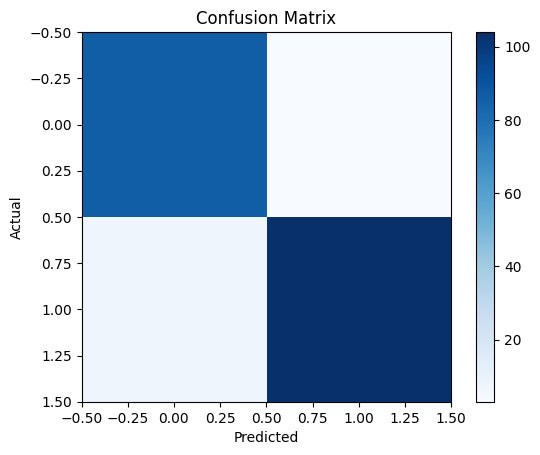

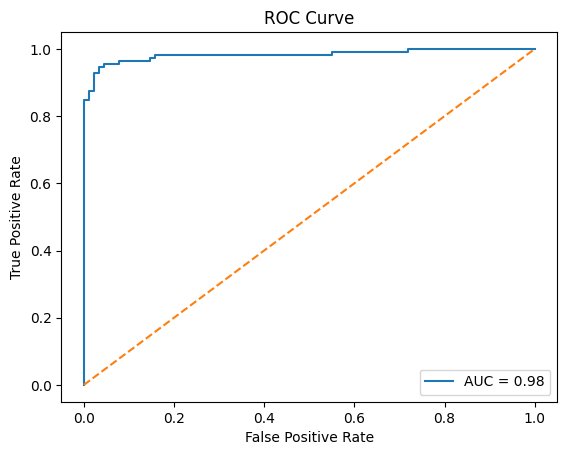

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

# Load the file (put advertising.csv in the same folder)
df = pd.read_csv("C:/Users/safwa/Downloads/advertising.csv")

# Quick look at the data
print("Head of the dataset:")
print(df.head())

# Clean the data
# see if any missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# remove exact duplicate rows if any
df = df.drop_duplicates()

# drop rows with missing values (if they exist)
df = df.dropna()

# Exploratory data check
print("\nDataset info:")
print(df.info())

print("\nBasic stats:")
print(df.describe())

# Plot some simple charts to understand data
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age distribution")
plt.show()

sns.histplot(df['Area Income'], bins=20, kde=True)
plt.title("Area income distribution")
plt.show()

sns.countplot(x='Clicked on Ad', data=df)
plt.title("Clicked on Ad (0 = no, 1 = yes)")
plt.show()

# See correlations between main columns
plt.figure(figsize=(6,4))
sns.heatmap(df[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Clicked on Ad']].corr(),
            annot=True, cmap="coolwarm")
plt.title("Feature correlations")
plt.show()

# Prepare features and label
X = df[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage']]
y = df['Clicked on Ad']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)   # learn params from train
X_test = scaler.transform(X_test)         # apply same transform to test

# Train logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Print evaluation
print("\nModel performance on test set:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Confusion matrix (visual)
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC curve and AUC
y_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label="AUC = %.2f" % roc_auc_score(y_test, y_prob))
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
